**Task: Perform customer segmentation using any method or tools you prefer.  Analyze the dataset and segment customers based on relevant parameters like Gender ,Age, or any other criteria you find important.**

I'm kicking off my analysis with a basic assumption: `the Spending Score is accurate and fair. Even though I don't have access to the specific data on how the spending score is calculated, if I did, I would definitely dig into it. My main goal is to identify what makes segments have a high spending score so that we can attract more customers with high spending scores.`

In [163]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
# importing the csv file and viewing it
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
# the data frame has 200 rows and 5 columns
df.shape

(200, 5)

In [166]:
# checking for duplicate Rows — No duplicates
df[df.duplicated]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [167]:
# checking for null values — No null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [168]:
# checking for the columns data types -- all good
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

* In the lines above, I checked if the data quality. Usually, the data needs cleaning, but here, it's all good. Now, we're ready to start the analysis.
* I will start the process by getting the `descriptive statistics for each column`. This will assist in guiding my analysis and checking for any outliers or anything that grabs my attention, prompting further investigation.

In [169]:
# get columns descriptive statistics
df.describe(include= 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


## Notes in the statistics:

* `Females (112)` outnumber males (88).
* `50%` of our customers are between `28 and 49`.
* `25%` of our customers are between `28 to 36`.
* The `majority` of our customers have a `yearly income below 78K`, with 50% below 61.5k.


## Segmenting by Age

Given the insights outlined above, the statistics related to age have captured my attention. To delve deeper into this aspect, I will initiate an investigation into the relationship between age and spending score. This exploration aims to unveil any nuanced patterns or trends associated with different age groups and their corresponding spending behaviors.

In [170]:

age_bins = [18, 25, 35, 50, 70] # defining the bins that i will use to group the data
df_age = df.copy() 

# adding new column indicating each row according to the age bins
df_age['age_bin'] = pd.cut(df['Age'], bins=age_bins, labels=[ '18-25', '26-35', '36-50', '50-70'])

# deciding the type of aggregation for each column to use in the aggregation followning
aggregation = {
    'CustomerID': 'count', 
    'Age': 'mean',   
    'Annual Income (k$)': 'mean',  
    'Spending Score (1-100)': 'mean',  
}
# group by age then aggregate and round the numbers
result_with_age2 = df_age.groupby(['age_bin']).agg(aggregation).round(2)
# renaming the columns
result_with_age2.columns = ['count_customers','avg_age','avg_income','avg_spending_score']
result_with_age2.head(20)

,count_customers,avg_age,avg_income,avg_spending_score
age_bin,,,,
18-25,34,21.53,45.03,54.35
26-35,60,31.08,68.15,64.45
36-50,62,43.27,66.66,41.71
50-70,40,60.45,53.85,37.48


# Age and Spending Score Trends:
from the above table and the following graph we notice
* Customers in the age range of `26-35`, have the `highest average spending scores` compared to other age groups.
* Customers in the age range of `18-25`, have the `2nd highest average spending scores` despite having the lowest avg_income.

**according to the graph and results younger people have higher average spending score and it decreases with the age**

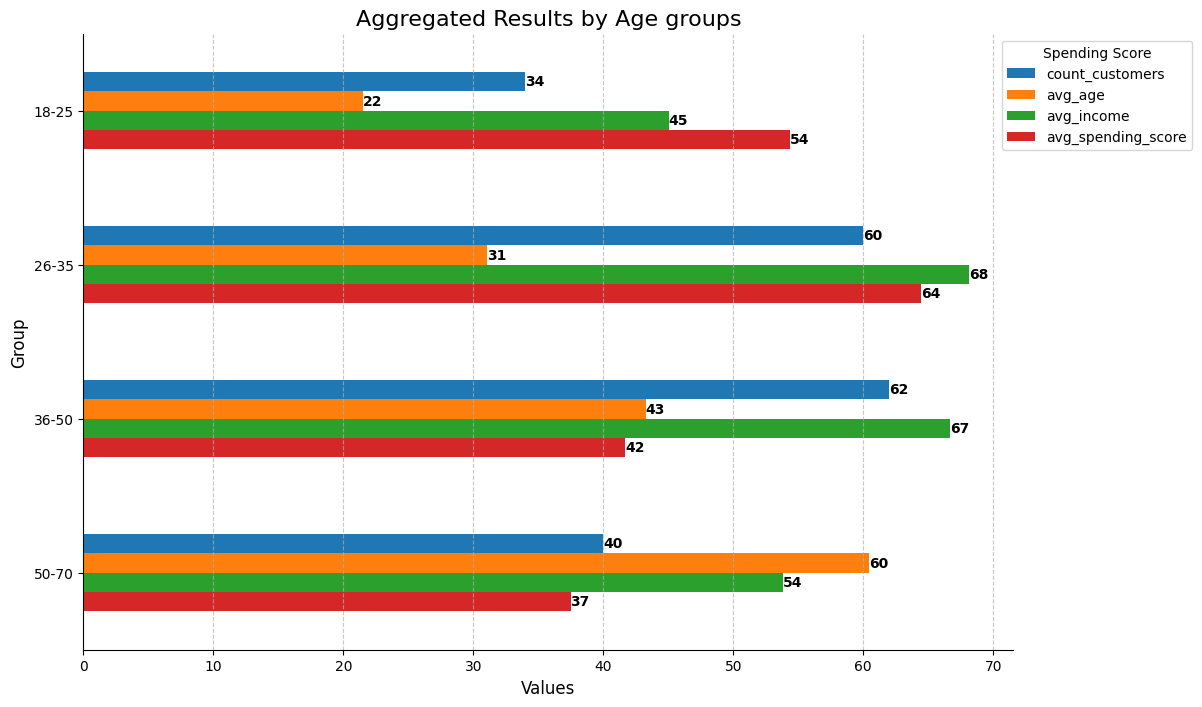

In [171]:
# Set a custom color palette for better distinction
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a horizontal bar chart
ax = result_with_age2.plot(kind='barh', figsize=(12, 8), color=custom_colors)

# Add horizontal grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize legend position and labels
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Spending Score')

# Set title and axis labels
plt.title('Aggregated Results by Age groups', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Group', fontsize=12)

# Customize y-axis ticks and labels
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customize x-axis ticks and labels
plt.xticks(fontsize=10)

# Remove spines (borders) on the top and right sides for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value annotations on the bars
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Show the plot
plt.show()


# Confirming the correlation between spending score and age through the code and graph below, we observe:

* `A correlation coefficient of -0.33`, indicating a negative relationship between spending score and age.
* Notably, individuals above the age of 40 tend to have a spending score of 60 or less, suggesting a `potential age-related pattern in spending behavior.`

In [172]:
print("Correlation spending score and Age = ",df['Spending Score (1-100)'].corr(df['Age']).__round__(2))

Correlation spending score and Age =  -0.33


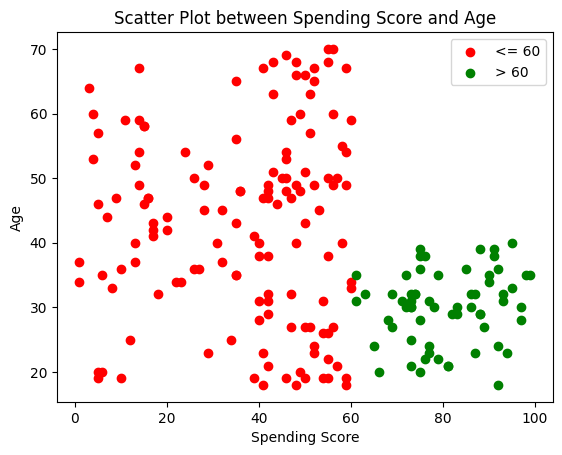

In [173]:
column1_values = df['Spending Score (1-100)']
column2_values = df['Age']

# Create a mask for values above 60 in column1
mask_above_60 = column1_values > 60

# Scatter plot for values below or equal to 60
plt.scatter(column1_values[~mask_above_60], column2_values[~mask_above_60], label='<= 60', color='red')

# Scatter plot for values above 60
plt.scatter(column1_values[mask_above_60], column2_values[mask_above_60], label='> 60', color='green')

plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.title('Scatter Plot between Spending Score and Age')
plt.legend()
plt.show()

## Segmenting by Income

* **the Correlation between spending score and Annual income is close to 0**
* using the grouping and graph i don't see Correlation between spending score and Annual income



In [174]:
# Correlation between spending score and Annual income    
print("Correlation spending score and Annual income between = ",df['Spending Score (1-100)'].corr(df['Annual Income (k$)']))

Correlation spending score and Annual income between =  0.009902848094037608


In [175]:
income_bin = [0,40, 60, 80, 140] 
df_income = df.copy()
df_income['income_bin'] = pd.cut(df['Annual Income (k$)'], bins=income_bin, labels=[ '0-40K', '41-60K', '61-80K', '81-140K'])
aggregation = {
    'CustomerID': 'count',   # Use count for this column
    'Age': 'mean',   # Use count for this column
    'Annual Income (k$)': 'mean',    # Use mean for this column
    'Spending Score (1-100)': 'mean',    # Use mean for this column
}
result_with_income = df_income.groupby(['income_bin']).agg(aggregation).round(2)
result_with_income.columns = ['count_customers','avg_age','avg_income','avg_spending_score']
result_with_income.head(20)

,count_customers,avg_age,avg_income,avg_spending_score
income_bin,,,,
0-40K,50,35.28,27.40,49.48
41-60K,48,44.65,51.33,50.58
61-80K,64,38.30,70.62,50.27
81-140K,38,37.16,98.89,50.55


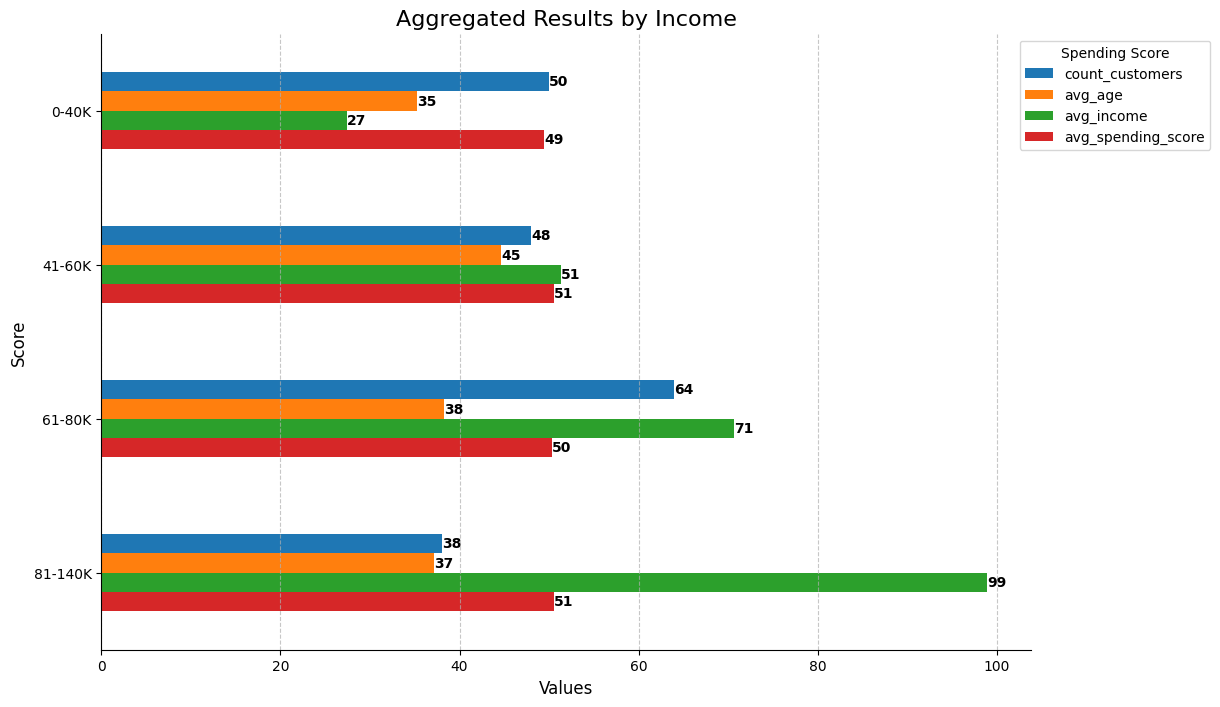

In [179]:
# Set a custom color palette for better distinction
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a horizontal bar chart
ax = result_with_income.plot(kind='barh', figsize=(12, 8), color=custom_colors)

# Add horizontal grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize legend position and labels
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Spending Score')

# Set title and axis labels
plt.title('Aggregated Results by Income', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Customize y-axis ticks and labels
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customize x-axis ticks and labels
plt.xticks(fontsize=10)

# Remove spines (borders) on the top and right sides for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value annotations on the bars
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Show the plot
plt.show()


## Segmenting by Spending Score

* The correlation between spending score and age becomes more pronounced in this analysis.
* Customers with a spending score above 60 have an average age of 30.
* The majority of our customers (75 of 200) maintain an average spending score of 50.
* Notably, all customers with a spending score below 60 have an average age above 40.
* **This segmentation sheds light on the interplay between age and spending score, offering valuable insights into customer segments.**


In [177]:
score_bin = [0,20, 40, 60, 80, 100]
df_score = df.copy()
df_score['score_bin'] = pd.cut(df['Spending Score (1-100)'], bins=score_bin, labels=[ '0-20', '21-40', '41-60', '61-80','81-100'])
aggregation = {
    'CustomerID': 'count',   # Use count for this column
    'Age': 'mean',   # Use count for this column
    'Annual Income (k$)': 'mean',    # Use mean for this column
    'Spending Score (1-100)': 'mean',    # Use mean for this column
}
result_with_score = df_score.groupby(['score_bin']).agg(aggregation).round(2)
result_with_score.columns = ['count_customers','avg_age','avg_income','avg_spending_score']
result_with_score.head(20)

,count_customers,avg_age,avg_income,avg_spending_score
score_bin,,,,
0-20,36,43.50,66.11,10.92
21-40,27,40.26,61.41,32.44
41-60,75,43.40,54.59,50.15
61-80,32,29.50,59.62,72.41
81-100,30,30.60,69.07,89.77


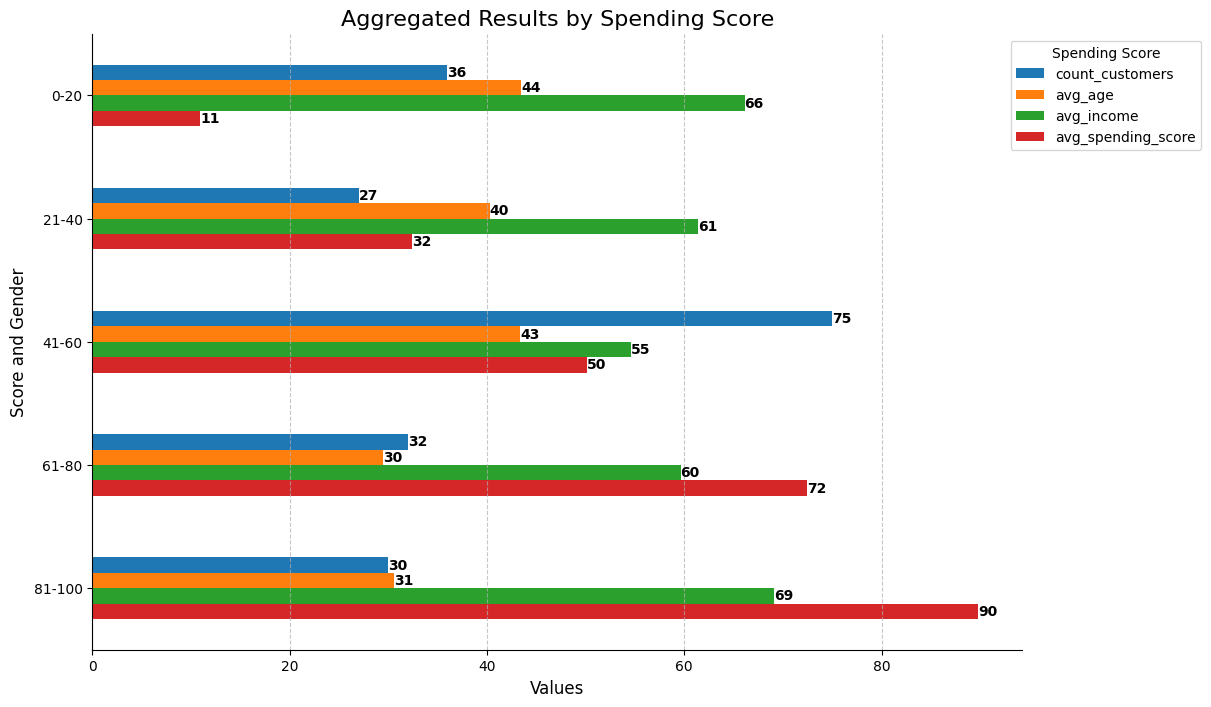

In [178]:
# Set a custom color palette for better distinction
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a horizontal bar chart
ax = result_with_score.plot(kind='barh', figsize=(12, 8), color=custom_colors)

# Add horizontal grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize legend position and labels
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Spending Score')

# Set title and axis labels
plt.title('Aggregated Results by Spending Score', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Score and Gender', fontsize=12)

# Customize y-axis ticks and labels
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customize x-axis ticks and labels
plt.xticks(fontsize=10)

# Remove spines (borders) on the top and right sides for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value annotations on the bars
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Show the plot
plt.show()


## **Recommendations:**
1. **Target Younger Demographics:** Given the higher average spending scores among younger age groups, consider tailoring marketing strategies to attract and retain younger customers.
  
2. **Explore Age-Specific Offers:** Recognizing the potential age-related pattern in spending behavior, explore age-specific promotions or discounts to capitalize on customer preferences.

3. **Diversify Marketing for Middle-Aged Customers:** With customers aged 26-35 exhibiting the highest spending scores, focus on diversifying marketing efforts to engage and retain this age group.

4. **Review Product Mix:** Evaluate the product mix to align with the preferences of customers with a spending score above 60. Identify high-performing products and optimize the product range accordingly.

5. **Monitor Customer Engagement for Older Demographics:** As customers with a spending score below 60 tend to have an average age above 40, monitor and enhance engagement strategies for this demographic.

These insights and recommendations aim to guide strategic decisions for attracting and retaining customers, ultimately optimizing the overall customer experience.
